# Sampling Methods

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE

# Random seed for replicability
seed = 42

In [2]:
data = pd.read_csv("../data/creditcard.csv")
X = data.drop('Class', axis=1)
print(X.shape)
y = data['Class']

(284807, 30)


## Introduction
In the EDA we ahve already seen that the data is heavily imbalanced.

In [3]:
# Print share of fraud and no fraudv
print(f"No fraud: {round(y.value_counts(normalize = True)[0] * 100, 3)} %")
print(f"Fraud: {round(y.value_counts(normalize = True)[1] * 100, 3)} %")

No fraud: 99.827 %
Fraud: 0.173 %


Sampling methods can help to deal with that problem.

## SMOTE: Synthetic Minority Over-sampling Technique

In [4]:
from imblearn.over_sampling import SMOTE # ref: https://imbalanced-learn.readthedocs.io/

In [5]:
X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_resample(X, y)

In [6]:
print(X_smote.shape)

(568630, 30)


In [7]:
# Print share of fraud and no fraud
print("After SMOTE (Oversampling):")
print(f"No fraud: {round(np.bincount(y_smote)[0]/y_smote.shape[0] * 100, 3)} %")
print(f"Fraud: {round(np.bincount(y_smote)[1]/y_smote.shape[0] * 100, 3)} %")

After SMOTE (Oversampling):
No fraud: 50.0 %
Fraud: 50.0 %


Now we have a perfectly balanced dataset!

## Equally big Sub-samples (Under-sampling)

### without scaling

In [8]:
# Get all the fraudulent transactions
fraud = data[data['Class'] == 1]
num_fraudulent_transactions = fraud.shape[0]

# Sample a set of the same size from the non-fraudulent transactions
non_fraud = data[data['Class'] == 0].sample(num_fraudulent_transactions)

df_sub = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=seed)

X_sub = df_sub.drop('Class', axis=1)
y_sub = df_sub['Class']

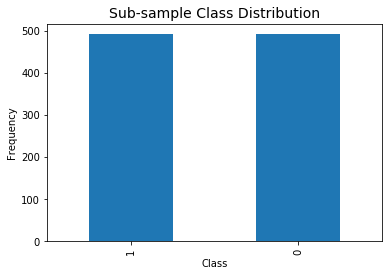

In [9]:
# Plot Class Distribution
y_sub.value_counts().plot(kind='bar')
plt.title('Sub-sample Class Distribution', fontsize=14)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Let's have a look at the data clustered data:

In [10]:
X_sub_tsne = TSNE(n_components=2, random_state=seed).fit_transform(X_sub)

In [11]:
def plot_cluster(X, y):
    fig = plt.figure(figsize=(12, 12))
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==0), label='No Fraud', linewidth=2)
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==1), label='Fraud', linewidth=2)
    plt.title('t-SNE', fontsize=14)
    plt.show()

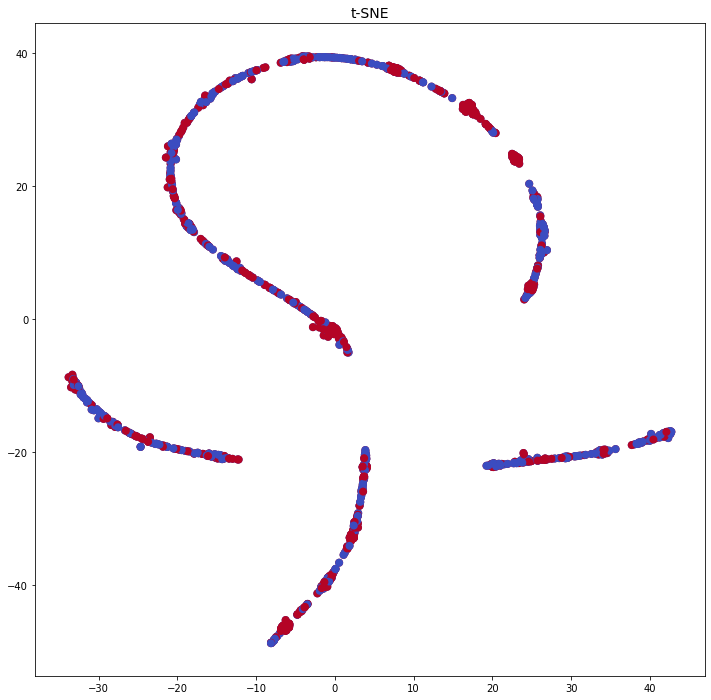

In [12]:
plot_cluster(X_sub_tsne, y_sub)

This looks very much like the data isn't separable at all. We've seen in the EDA that "Time" and "Amount" should be scaled. Let's give it a go and see what happens.

### Scaling Time and Amount

In [30]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # less prone to outliers than StandardScaler

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [14]:
# Get all the fraudulent transactions
fraud = data[data['Class'] == 1]
num_fraudulent_transactions = fraud.shape[0]

# Sample a set of the same size from the non-fraudulent transactions
non_fraud = data[data['Class'] == 0].sample(num_fraudulent_transactions)

df_sub = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=seed)

X_sub = df_sub.drop('Class', axis=1)
y_sub = df_sub['Class']

In [15]:
X_sub_tsne = TSNE(n_components=2, random_state=seed).fit_transform(X_sub)

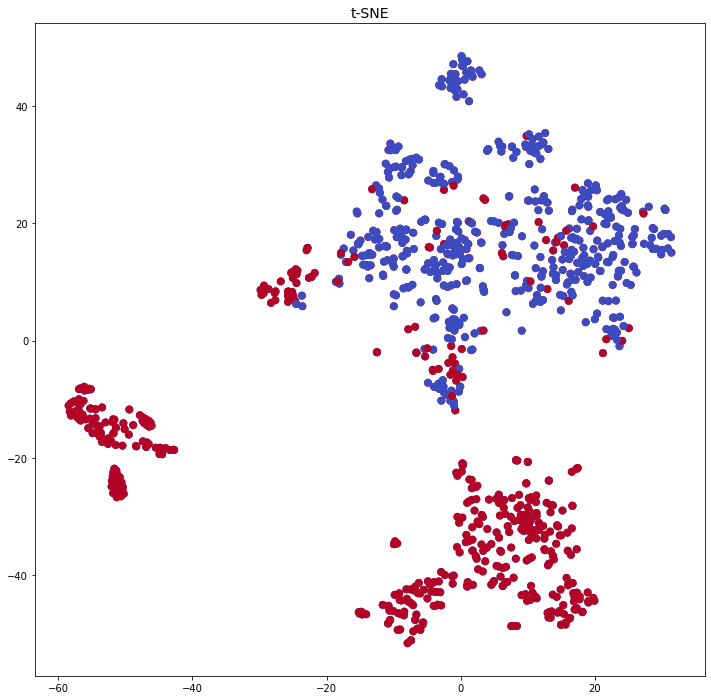

In [16]:
plot_cluster(X_sub_tsne, y_sub)

Awesome. This is already a pretty good separation of fraudulent and non-fraudelent cases. One can probably easily get 70-80% Accuracy on this.

### Scaling all features

In [43]:
data = pd.read_csv("../data/creditcard.csv")
X = data.drop('Class', axis=1)
print(X.shape)
y = data['Class']

(284807, 30)


In [44]:
X_scaled = pd.DataFrame(rob_scaler.fit_transform(X), columns=data.drop('Class', axis=1).columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579


In [48]:
data_scaled = pd.concat([X_scaled, y], axis=1)
data_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [49]:
# Get all the fraudulent transactions
fraud = data_scaled[data_scaled['Class'] == 1]
num_fraudulent_transactions = fraud.shape[0]

# Sample a set of the same size from the non-fraudulent transactions
non_fraud = data_scaled[data_scaled['Class'] == 0].sample(num_fraudulent_transactions)

df_sub = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=seed)

X_sub = df_sub.drop('Class', axis=1)
y_sub = df_sub['Class']

In [50]:
X_sub_tsne = TSNE(n_components=2, random_state=seed).fit_transform(X_sub)

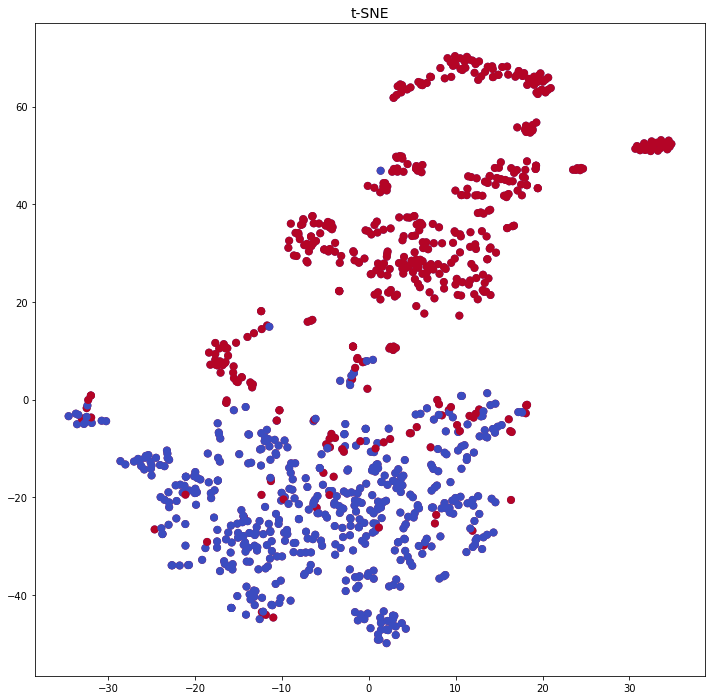

In [51]:
plot_cluster(X_sub_tsne, y_sub)

When scaling all features, there seem to be fewer distingushied clusters.